In [117]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
# import plotly.express as px
# import plotly.io as pio

import sys
sys.path.append("../scripts")
from TrackReconstruction_functions import *
from reconstruction_functions import *



In [118]:
# diff = "nodiff"
# diff = "5percent"
# diff = "0.25percent"
# diff = "0.1percent"
diff = "0.05percent"
# diff = "0.0percent"
pressure = 10

# Set the detector size depending on the pressure
density = 5.987*pressure
M = 1000/0.9
det_size = 1000*np.cbrt((4 * M) / (np.pi * density))/2.0
print(det_size)

# Load in the signal metadata
nubb_meta = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_{pressure}bar_{diff}_reco.h5", "meta")
nubb_meta["Type"] = "0nubb"
display(nubb_meta)

# ----------------------------------------------------------------------------------------------------

# Load in the background
Bkg_meta = pd.DataFrame()
Tl_meta = pd.DataFrame()
Bi_meta = pd.DataFrame()

Tl_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_reco.h5", "meta")
Tl_meta["Type"] = "Tl"
Bi_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_{diff}_reco.h5", "meta")
Bi_meta["Type"] = "Bi"
single_meta = pd.read_hdf(f"../data/Trackreco/ATPC_single_{pressure}bar_{diff}_reco.h5", "meta")
single_meta["Type"] = "single"
Rn_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_cathode_{pressure}bar_{diff}_reco.h5", "meta")
Rn_meta["Type"] = "Rn"

Bkg_meta = pd.concat([Tl_meta, Bi_meta, single_meta, Rn_meta])
# Bkg_meta = pd.concat([Tl_meta])
display(Bkg_meta)

# ----------------------------------------------------------------------------------------------------
# Load in the files for plotting the background events

# Tl                = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_reco.h5",    "data")
# Tl_true_hits      = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_nexus_filtered.h5", "MC/hits")
# Tl_true_parts     = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_nexus_filtered.h5", "MC/particles")

# Bi                = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_{diff}_reco.h5",    "data")
# Bi_true_hits      = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_nexus_filtered.h5", "MC/hits")
# Bi_true_parts     = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_nexus_filtered.h5", "MC/particles")

# Tl_diffused_hits  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_filtered.h5", "MC/hits")
# Bi_diffused_hits  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_{diff}_filtered.h5", "MC/hits")


# Single              = pd.read_hdf(f"../data/Trackreco/ATPC_single_{pressure}bar_{diff}_reco.h5",    "data")

# Shift the positions
# Tl["Type"] = "Tl"
# Bi["Type"] = "Bi"
# Single["Type"] = "single"
# Tl_true_hits["z"] = Tl_true_hits["z"] + det_size
# Bi_true_hits["z"] = Bi_true_hits["z"] + det_size

# Bkg            =  pd.concat([Tl, Bi, Single])
# Bkg_true_hits  =  pd.concat([Tl_true_hits, Bi_true_hits])
# Bkg_true_parts =  pd.concat([Tl_true_parts, Bi_true_parts])
# Bkg_diffused_hits = pd.concat([Tl_diffused_hits])

# Bkg            =  pd.concat([Tl])
# Bkg_true_hits  =  pd.concat([Tl_true_hits])
# Bkg_true_parts =  pd.concat([Tl_true_parts])

# ----------------------------------------------------------------------------------------------------
# Load in the pickle files
# bi_file = f"../data/Trackreco/ATPC_Bi_{pressure}bar_{diff}_trackreco.pkl"
# tl_file = f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_trackreco.pkl"

# # Load Bi data
# with open(bi_file, 'rb') as pickle_file:
#     Tracks_Bi = pickle.load(pickle_file)
#     connections_Bi = pickle.load(pickle_file)
#     connection_counts_Bi = pickle.load(pickle_file)

# Load Tl data
# with open(tl_file, 'rb') as pickle_file:
#     Tracks_Tl = pickle.load(pickle_file)
#     connections_Tl = pickle.load(pickle_file)
#     connection_counts_Tl = pickle.load(pickle_file)

# Merge dictionaries
# Bkg_Tracks = {**Tracks_Bi, **Tracks_Tl}
# Bkg_connections = {**connections_Bi, **connections_Tl}
# Bkg_connection_counts = {**connection_counts_Bi, **connection_counts_Tl}

# Bkg_Tracks = {**Tracks_Tl}
# Bkg_connections = {**connections_Tl}
# Bkg_connection_counts = {**connection_counts_Tl}

# ----------------------------------------------------------------------------------------------------




1434.793678890316


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,blob1RTD,blob2RTD,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,contained,Type
0,81,0,1,1,6,183.888,2.456936,0.913595,0.485052,0.725624,0.485052,0.725624,0.485052,1.000000,1.000000,1.433414e-16,1.372136e-16,Primary,True,0nubb
0,82,0,1,0,5,170.509,2.454605,1.243756,0.731000,0.933971,0.032196,0.933971,0.032196,1.000000,1.000000,0.000000e+00,0.000000e+00,Primary,True,0nubb
0,83,0,1,9,29,306.743,2.474445,0.699732,0.326321,0.781468,0.699732,0.781468,0.699732,1.798141,1.639986,6.502749e-01,4.974309e-01,Primary,True,0nubb
0,84,0,1,2,4,94.067,2.317291,0.946379,0.439186,0.946379,0.439186,0.946379,0.439186,1.000000,1.000000,0.000000e+00,0.000000e+00,Primary,True,0nubb
0,84,1,0,0,1,41.691,0.128485,0.098422,0.030063,0.098422,0.030063,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,Brem,True,0nubb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,877,1,0,8,8,0.000,0.146773,0.146773,0.146773,0.146773,0.146773,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,Brem,True,0nubb
0,878,0,1,1,3,101.625,2.460557,1.433094,1.027463,1.027463,0.000377,1.027463,0.000377,1.000000,1.000000,0.000000e+00,0.000000e+00,Primary,True,0nubb
0,879,0,1,0,1,92.524,2.467426,1.301082,0.871929,1.301082,0.871929,1.301082,0.871929,1.000000,1.000000,0.000000e+00,0.000000e+00,Primary,True,0nubb
0,880,0,1,0,7,192.692,2.449347,1.086305,0.840605,0.695390,0.420416,0.695390,0.420416,1.000000,1.000000,4.370428e-17,0.000000e+00,Primary,True,0nubb


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,blob1RTD,blob2RTD,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,contained,Type
0,86669,0,1,4,5,36.849,1.512147,0.869075,0.620779,0.869075,0.620779,0.869075,0.620779,1.000000,1.000000,0.000000,0.000000,Primary,True,Tl
0,86669,1,0,0,0,0.000,0.168144,0.168144,0.168144,0.168144,0.168144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True,Tl
0,86669,2,0,1,1,0.000,0.209297,0.209297,0.209297,0.209297,0.209297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True,Tl
0,86669,3,0,9,9,0.000,0.303101,0.303101,0.303101,0.303101,0.303101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,True,Tl
0,86669,4,0,2,3,27.456,0.081179,0.048066,0.033113,0.048066,0.033113,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,Brem,True,Tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4502399,4,0,8,8,0.000,0.172228,0.172228,0.172228,0.172228,0.172228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brem,False,Rn
0,4502399,5,0,0,1,20.685,0.334395,0.242011,0.016469,0.242011,0.016469,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,Brem,False,Rn
0,4502399,6,0,5,6,18.054,0.233100,0.225216,0.007884,0.225216,0.007884,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,Brem,False,Rn
0,4502424,0,1,12,15,273.939,2.406124,0.989522,0.526848,0.804502,0.376700,0.804502,0.376700,1.484427,1.038808,0.675314,0.130472,Primary,False,Rn


In [119]:
nubb_events = len(nubb_meta.event_id.unique())
Bkg_events = len(Bkg_meta.event_id.unique())
Bi_events = len(Bi_meta.event_id.unique())
Tl_events = len(Tl_meta.event_id.unique())
single_events = len(single_meta.event_id.unique())
Rn_events = len(Rn_meta.event_id.unique())

print("0vbb:", nubb_events)
print("Bkg:", Bkg_events)
print("Bi:", Bi_events)
print("Tl:", Tl_events)
print("Rn:", Rn_events)

sf_bkg = nubb_events/Bkg_events
sf_bi = nubb_events/Bi_events
sf_tl = nubb_events/Tl_events
sf_single = nubb_events/single_events
sf_rn = nubb_events/Rn_events
print("Bkg scale factor:", sf_bkg)
print("Bi scale factor:", sf_bi)
print("Tl scale factor:", sf_tl)
print("Single scale factor:", sf_single)
print("Rn scale factor:", sf_rn)

0vbb: 194462
Bkg: 899703
Bi: 358238
Tl: 207018
Rn: 147631
Bkg scale factor: 0.21614021515989165
Bi scale factor: 0.5428290689429932
Tl scale factor: 0.9393482692326272
Single scale factor: 1.0364673275770173
Rn scale factor: 1.3172165737548347


In [120]:
# Plot some variables like number of tracks
%matplotlib widget


def PlotDistributions(df_meta, col, label, pressure, diffusion, mode, Eres, scale_factor, axs, applycuts):

    print("Running cuts with")
    print("Pressure:",  pressure,"bar")
    print("Diffusion:", diffusion )

    uselog=True
    # uselog=False

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    if applycuts:
        df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, Eres)
        df_primary = df_primary[ cuts ]
        df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    event_energy = df_meta.groupby("event_id").energy.sum()

    df_counts      = GetNTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem  = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    # Calculate the ratio of x-rays to tracks
    # x_ray_ratio = df_meta.groupby("event_id").apply(compute_ratio).reset_index(name="ratio")


    weights        = np.ones_like(df_primary.energy)  * scale_factor
    weights_counts = np.ones_like(df_counts.N_tracks) * scale_factor
    weights_deltas = np.ones_like(deltas.energy)      * scale_factor
    weights_brem   = np.ones_like(brems.energy)       * scale_factor
    weights_Ndelta = np.ones_like(N_delta.N_Delta)    * scale_factor
    weights_Nbrem  = np.ones_like(N_brem.N_Brem)      * scale_factor
    weights_trke   = np.ones_like(trk_e)              * scale_factor
    weights_energy = np.ones_like(event_energy)       * scale_factor

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_counts);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()
    if (uselog): axs[0,0].semilogy()

    axs[0,1].hist(df_primary.length, bins = np.linspace(0, 5000/pressure, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length / P [mm/bar]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()
    if (uselog): axs[0,1].semilogy()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()
    if (uselog): axs[0,2].semilogy()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()
    if (uselog): axs[1,1].semilogy()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()
    if (uselog): axs[2,1].semilogy()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()
    if (uselog): axs[1,0].semilogy()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()
    if (uselog): axs[2,0].semilogy()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()
    if (uselog): axs[1,2].semilogy()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()
    if (uselog): axs[2,2].semilogy()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()
    if (uselog): axs[3,0].semilogy()

    axs[3,1].hist(df_primary.Tortuosity1/df_primary.Tortuosity2, bins = np.linspace(0, 3, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Ends Ratio")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    if (uselog): axs[3,1].semilogy()

    axs[3,2].hist(df_primary.Squiglicity1/df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Ends Ratio")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()
    if (uselog): axs[3,2].semilogy()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()
    if (uselog): axs[4,0].semilogy()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()
    if (uselog): axs[4,1].semilogy()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()
    if (uselog): axs[4,2].semilogy()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()
    if (uselog): axs[5,0].semilogy()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Nbrem);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()
    if (uselog): axs[5,1].semilogy()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Ndelta);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()
    if (uselog): axs[5,2].semilogy()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights_trke);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    if (uselog): axs[6,0].semilogy()

    axs[6,1].hist(event_energy, bins = np.linspace(2.3,2.6,100), histtype="step", color = col, label = label, weights = weights_energy);
    axs[6,1].set_xlabel("Event Energy [MeV]")
    axs[6,1].set_ylabel("Entries")
    axs[6,1].legend()
    if (uselog): axs[6,1].semilogy()

    # axs[6,2].hist(deltas.Tortuosity1, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights_deltas);
    # axs[6,2].set_xlabel("Delta Blob2 Energy")
    # axs[6,2].set_ylabel("Entries")
    # axs[6,2].legend()
    # if (uselog): axs[6,2].semilogy()

    axs[6,2].hist(df_primary.blob2RTD, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[6,2].set_xlabel("Blob 2 energy RTD [MeV]")
    axs[6,2].set_ylabel("Entries")
    axs[6,2].legend()
    if (uselog): axs[6,2].semilogy()


    bin_edges = np.arange(-0.5, 3.5, 0.5)
    bin_centers = np.arange(0, 3, 0.5)

    # Multiplicities
    # axs[6,1].hist(x_ray_ratio.ratio, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[6,1].set_xlabel("N x-rays per track")
    # axs[6,1].set_ylabel("Entries")
    # axs[6,1].set_xticks(bin_centers) ;
    # axs[6,1].legend()
    # if (uselog): axs[6,1].semilogy()



    plt.tight_layout()

    return df_primary.event_id.unique()

# fig, axs = plt.subplots(7, 3, figsize=(15, 25))
# PlotDistributions(nubb_meta, "darkgreen", f"0nubb {pressure}bar",pressure, diff, "all", 1.0, 1, axs, False)
# PlotDistributions(Bkg_meta,  "k",   f"Bkg {pressure}bar",  pressure, diff, "all", 1.0, sf_bkg, axs, False)

# PlotDistributions(Bi_meta,      "Teal",         f"Bi {pressure}bar",      pressure, diff, "all", 1.0, sf_bi,     axs, False)
# PlotDistributions(Tl_meta,      "Orange",       f"Tl {pressure}bar",      pressure, diff, "all", 1.0, sf_tl,     axs, False)
# PlotDistributions(single_meta,  "darkviolet",   f"Single {pressure}bar",  pressure, diff, "all", 1.0, sf_single, axs, False)
# PlotDistributions(Rn_meta,      "pink",         f"Radon {pressure}bar",   pressure, diff, "all", 1.0, sf_rn, axs, False)



Cuts are being optimized for enriched Xe
Running cuts with
Pressure: 10 bar
Diffusion: 0.05percent
Running cuts with
Pressure: 10 bar
Diffusion: 0.05percent
Running cuts with
Pressure: 10 bar
Diffusion: 0.05percent
Running cuts with
Pressure: 10 bar
Diffusion: 0.05percent
Running cuts with
Pressure: 10 bar
Diffusion: 0.05percent
Running cuts with
Pressure: 10 bar
Diffusion: 0.05percent
Correcting Efficiency by factor  0.806
Efficiency nubb: 25.68  +/- 0.106 %
Bkg Rej: Bkg: 1.708 +/- 0.014 %      (bkg rej == 98.292 %)
Bkg Rej: Bi: 1.235 +/- 0.018 %      (bkg rej == 98.765 %)
Bkg Rej: Tl: 0.442 +/- 0.015 %      (bkg rej == 99.558 %)
Bkg Rej: Single: 5.343 +/- 0.052 %      (bkg rej == 94.657 %)
Bkg Rej: Radon: 3.396 +/- 0.047 %      (bkg rej == 96.604 %)
FOM: 1.964979490942233
Num Sig: 61956.74
Num Bkg: 15366
Num Bi: 4425
Num Tl: 916
Num single: 10025
Num Radon: 5013


,Pressure,Diffusion,cut,nubb_gen,nubb_cut,nubb_eff,Bkg_gen,Bkg_cut,Bkg_eff,Bi_gen,...,Bi_eff,Tl_gen,Tl_cut,Tl_eff,single_gen,single_cut,single_eff,Rn_gen,Rn_cut,Rn_eff
0,10,0.05percent,enr,194462,61956.74,0.256796,899703,15366,0.017079,358238,...,0.012352,207018,916,0.004425,187620,10025,0.053432,147631,5013,0.033956


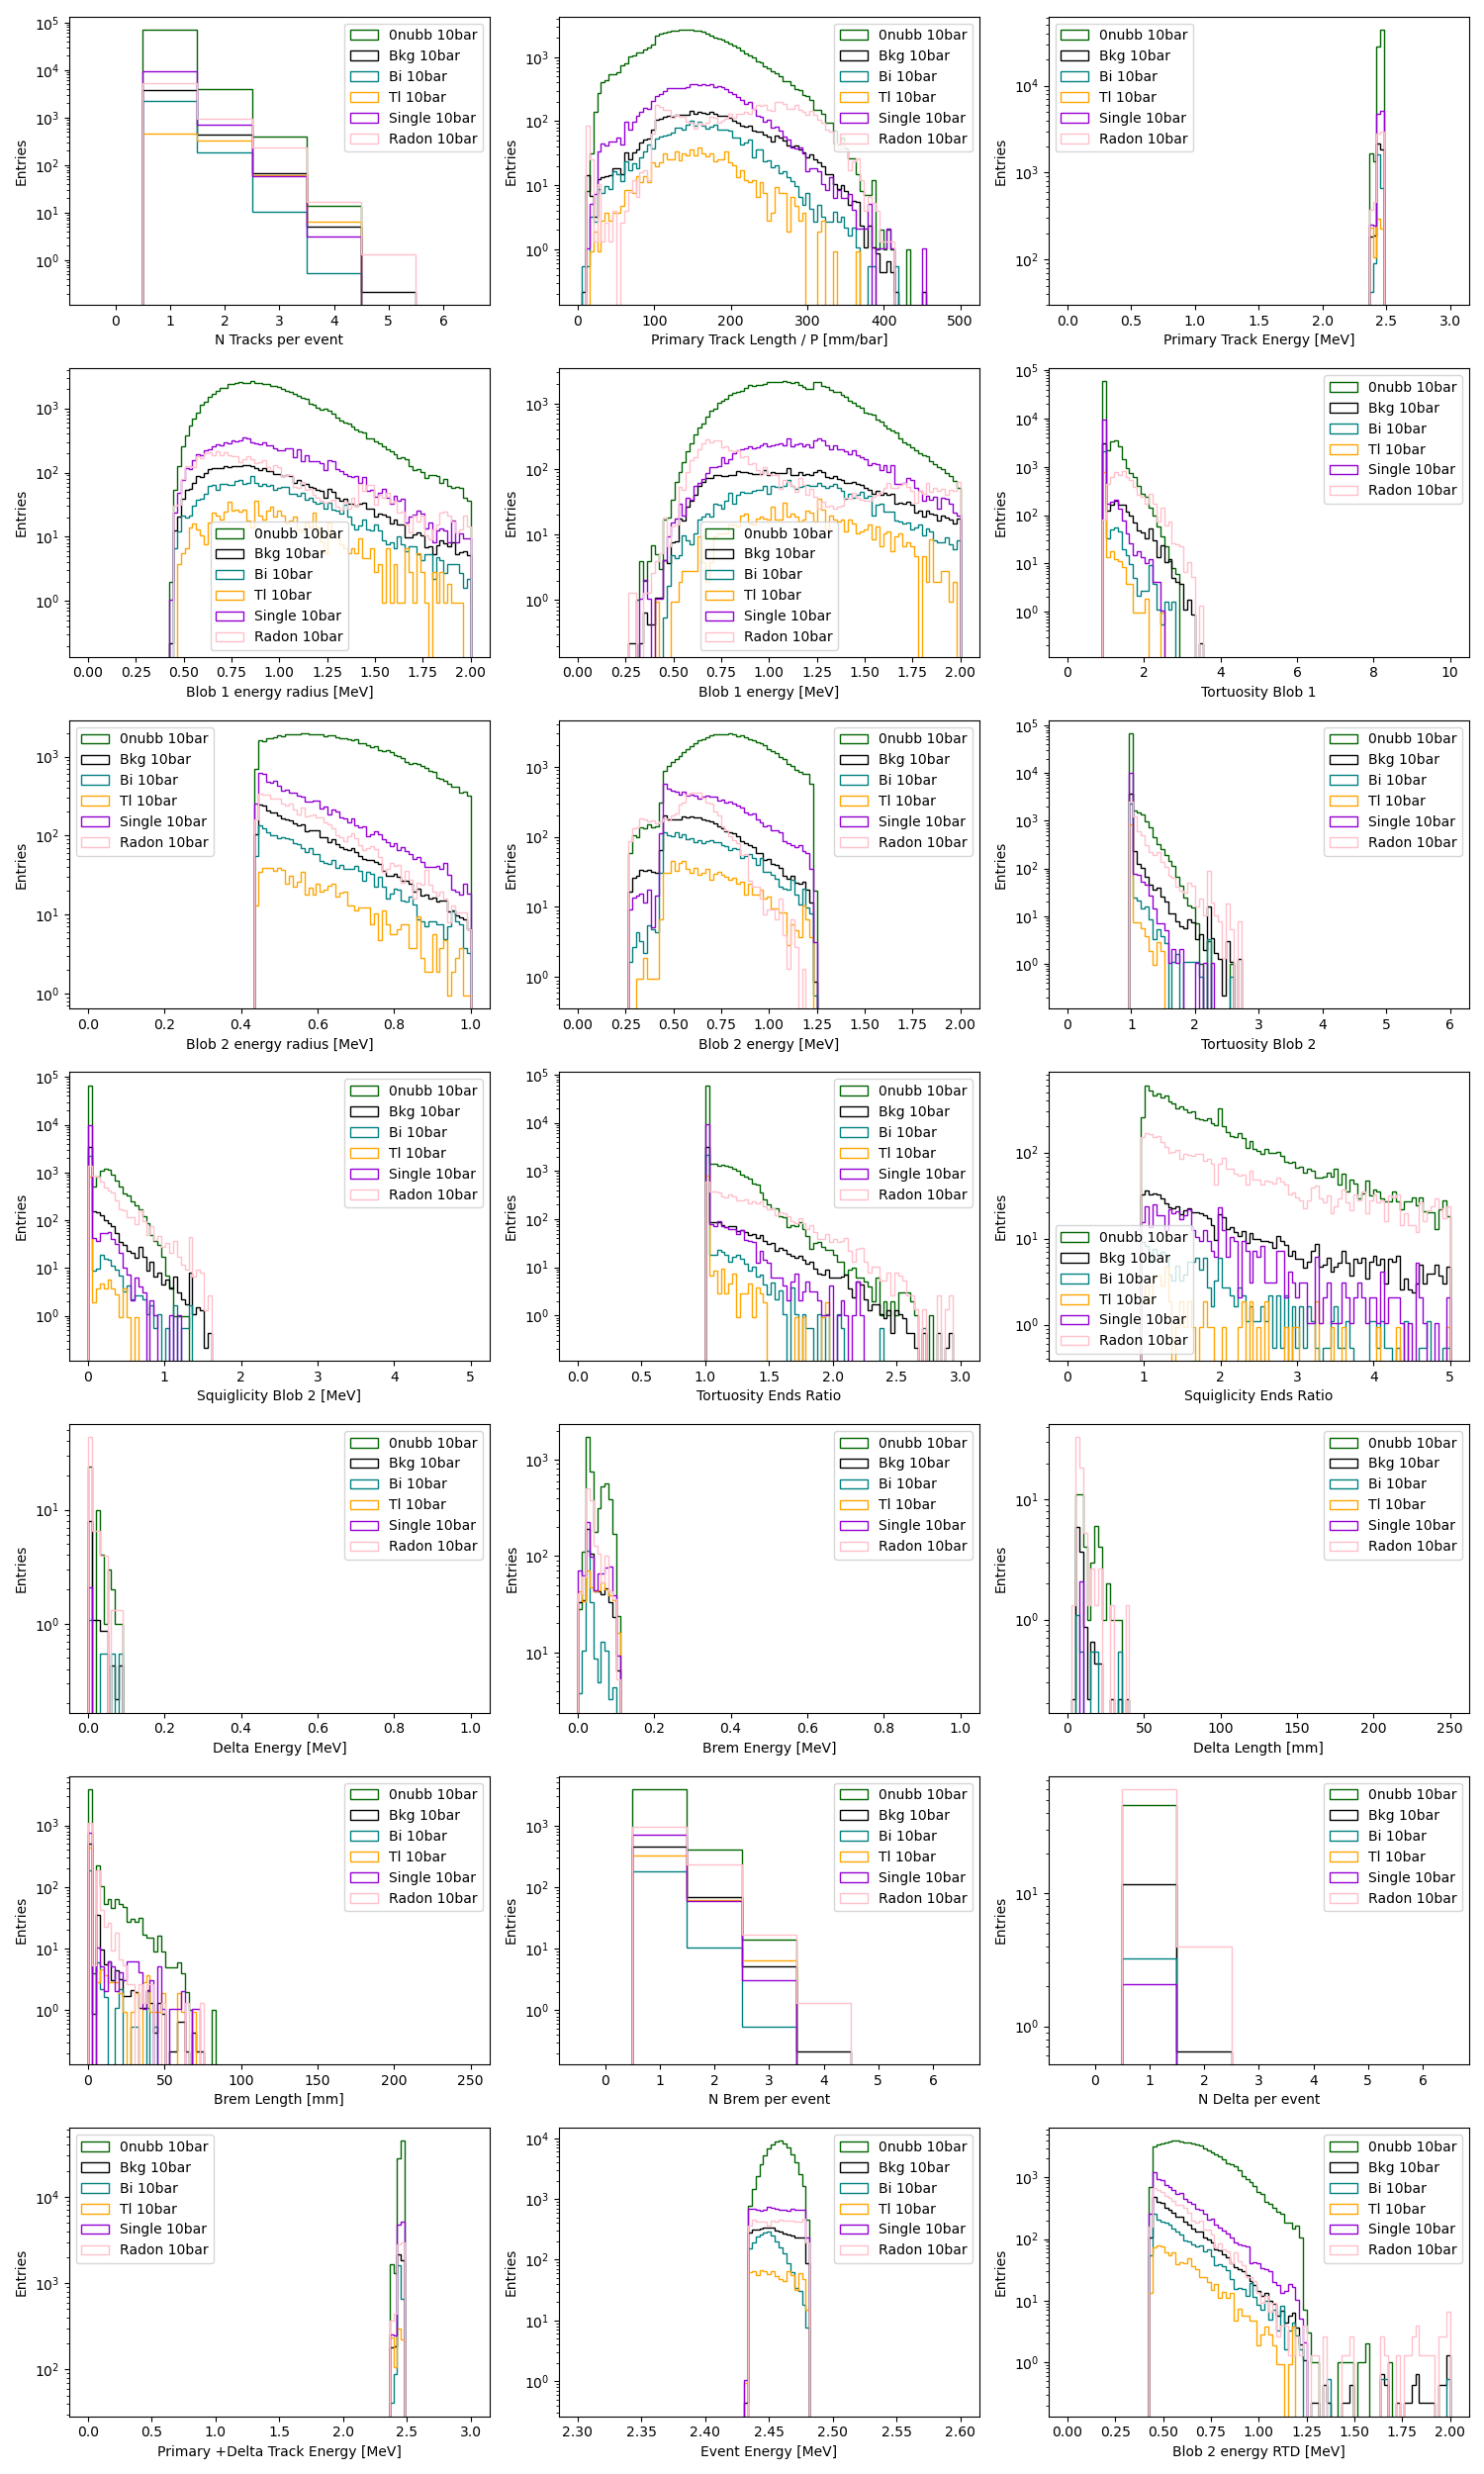

In [121]:


def ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, Eres):

    cuts = []

    # Apply containment
    # df_meta = df_meta[df_meta.contained == True]
    # df_primary = df_primary[df_primary.contained == True]
    df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)

    # This is common for all NEXT-tonne analysis
    if (mode == "next1t"):
        df_counts = GetNTracks(df_meta)
        df_counts = df_counts[df_counts.N_tracks == 1]
        df_meta = df_meta[df_meta["event_id"].isin(df_counts.event_id.unique())]
        df_primary = df_primary[df_primary["event_id"].isin(df_counts.event_id.unique())]

    # 1 bar
    if (pressure == 1):
       
        # 1bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.33) & (df_primary.energy > 2.37) & (df_primary.length > 2225) & (df_primary.blob1 < 1) & (df_primary.Tortuosity2 > 1.07)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.energy > 2.4) & (df_primary.length > 2400) & (df_primary.blob1 < 1) & (df_primary.Tortuosity2 > 1.07)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.0)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 5%
        elif (diffusion == "5percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.33) &  (df_primary.energy > 2.38) & (df_primary.length >1950) & (df_primary.Tortuosity2 > 1.07)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.blob2 > 0.45) & (df_primary.blob1R > 0.34) &  (df_primary.energy > 2.35) & (df_primary.Tortuosity2 >1.3) & (df_primary.length >1700)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.0)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.25%
        elif (diffusion == "0.25percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.42) & (df_primary.blob2 > 0.45) & (df_primary.energy > 2.39) & (df_primary.length >1200)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.54) & (df_primary.energy > 2.4) & (df_primary.length >1200) & (df_primary.blob1 <1.3)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.35)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.1%
        elif (diffusion == "0.1percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.42) & (df_primary.blob2 > 0.45) & (df_primary.energy > 2.4) & (df_primary.length > 1000) & (df_primary.blob1 <1.75)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.blob2 > 0.6)  & (df_primary.energy > 2.4) & (df_primary.length > 1000)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.35)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 10 He%
        elif (diffusion == "0.05percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.41) & (df_primary.blob2 > 0.4) & (df_primary.energy > 2.4) & (df_primary.length > 1000)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.48) & (df_primary.blob2 > 0.5) & (df_primary.energy > 2.4) & (df_primary.length > 600)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.37)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.0%
        elif (diffusion == "0.0percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2 > 0.18) & (df_primary.blob2R > 0.27) &  (df_primary.energy > 2.33) & (df_primary.length > 600)
            elif (mode == "nat"):
                cuts = (df_primary.blob2 > 0.35) & (df_primary.blob2R > 0.38) &  (df_primary.blob1 > 0.55) &  (df_primary.energy > 2.4) & (df_primary.length > 600)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.16)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")
    # -------------------------------------------------------------------------------------------------------------------------------------
    # 5bar
    elif (pressure == 5):
    
        # 5 bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.42) & (df_primary.blob2 > 0.495) & (df_primary.energy > 2.4) & (df_primary.length > 350)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.51) & (df_primary.energy > 2.4) & (df_primary.length > 360) & (df_primary.blob1 <1.1)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.46)
            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 5bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.52) & (df_primary.energy > 2.4) & (df_primary.length > 250)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.4) &  (df_primary.blob2 > 0.56) & (df_primary.energy > 2.4)  & (df_primary.length > 250) & (df_primary.blob1 < 1.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.445)
            else:
                print("Unknown cut mode specified")

        # 5bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2 > 0.67) & (df_primary.energy > 2.35) & (df_primary.blob1R > 0.6) & (df_primary.length > 20)
            elif (mode == "nat"):
                cuts = (df_primary.blob2 > 0.71) & (df_primary.energy > 2.4) & (df_primary.length > 200)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.42)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 10bar
    elif (pressure == 10):

        # 10bar no diff
        if (diffusion == "nodiff"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.58) & (df_primary.energy > 2.4) & (df_primary.length > 120)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.5) & (df_primary.blob2 > 0.57) & (df_primary.energy > 2.4) & (df_primary.length > 150) & (df_primary.blob1 < 1.25)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.525)
            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 10bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.555) & (df_primary.energy > 2.4) & (df_primary.length > 90)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.53) & (df_primary.blob2 > 0.53) &  (df_primary.energy > 2.4) & (df_primary.length > 110)  & (df_primary.blob1 < 1.5)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.515)
            else:
                print("Unknown cut mode specified")

        # 10bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.blob2 > 0.27) & (df_primary.energy > 2.37) & (df_primary.length > 7)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.47) & (df_primary.energy > 2.4)& (df_primary.length > 10)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.415)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 15bar
    elif (pressure == 15):
        
        # 15bar no diff
        if (diffusion == "nodiff"):
        
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.52) & (df_primary.blob2 > 0.61) & (df_primary.energy > 2.4) & (df_primary.length > 75)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.56) & (df_primary.blob2 > 0.58) & (df_primary.energy > 2.4) & (df_primary.length > 90)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.562)
            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 15bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.6) & (df_primary.energy > 2.37) & (df_primary.length > 65)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.54) & (df_primary.blob2 > 0.55) & (df_primary.energy > 2.4) & (df_primary.length > 80)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.56)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 15bar 10% he
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts =  (df_primary.blob2 > 0.73) & (df_primary.energy > 2.38) & (df_primary.length > 5)
            elif (mode == "nat"):
                cuts =  (df_primary.blob2 > 0.75) & (df_primary.energy > 2.42) & (df_primary.length > 5)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.41)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 25bar
    elif (pressure == 25):

        # 25bar no diff
        if (diffusion == "nodiff"):
        
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.56) & (df_primary.blob2 > 0.695) & (df_primary.energy > 2.4) & (df_primary.length > 10)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.57) & (df_primary.blob2 > 0.7) & (df_primary.energy > 2.4)  & (df_primary.length > 10)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.62)
            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 25bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.53) & (df_primary.blob2 > 0.43) & (df_primary.blob1 > 0.3) & (df_primary.energy > 2.4) & (df_primary.length > 10)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.55) & (df_primary.energy > 2.4) & (df_primary.length > 50)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.58)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 25bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.43) & (df_primary.blob2 > 0.43) & (df_primary.blob1 > 0.3) & (df_primary.energy > 2.4) & (df_primary.length > 3)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.5) & (df_primary.energy > 2.4) & (df_primary.length > 5)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.44)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    else:
        print("Unknown pressure specified")

    return df_meta, df_primary, cuts



fig, axs = plt.subplots(7, 3, figsize=(15, 25))

# mode = "nat"
mode = "enr"
# mode = "next1t"

if (mode =="enr"):
    print("Cuts are being optimized for enriched Xe")
    mass = 1
elif (mode == "next1t"):
    print("Cuts are being optimized for next1t analysis")
    mass = 1
else:
    print("Cuts are being optimized for natural Xe")
    mass = 10

nubb_cut    = PlotDistributions(nubb_meta,    "darkgreen",    f"0nubb {pressure}bar",   pressure, diff, mode, 1.0, 1,         axs, True)
Bkg_cut     = PlotDistributions(Bkg_meta,     "k",            f"Bkg {pressure}bar",     pressure, diff, mode, 1.0, sf_bkg,    axs, True)
Bi_cut      = PlotDistributions(Bi_meta,      "Teal",         f"Bi {pressure}bar",      pressure, diff, mode, 1.0, sf_bi,     axs, True)
Tl_cut      = PlotDistributions(Tl_meta,      "Orange",       f"Tl {pressure}bar",      pressure, diff, mode, 1.0, sf_tl,     axs, True)
single_cut  = PlotDistributions(single_meta,  "darkviolet",   f"Single {pressure}bar",  pressure, diff, mode, 1.0, sf_single, axs, True)
Rn_cut      = PlotDistributions(Rn_meta,      "Pink",         f"Radon {pressure}bar",   pressure, diff, mode, 1.0, sf_rn,     axs, True)


nubb_cut_num    = len(nubb_cut)
Bkg_cut_num     = len(Bkg_cut)
Bi_cut_num      = len(Bi_cut)
Tl_cut_num      = len(Tl_cut)
single_cut_num  = len(single_cut)
Rn_cut_num      = len(Rn_cut)

# Apply the assymetric energy res cut
nubb_cut_num   = ApplyAssymEResCut("nubb",   nubb_cut_num)
# Bkg_cut_num    = ApplyAssymEResCut("Bkg",    Bkg_cut_num)
# Bi_cut_num     = ApplyAssymEResCut("Bi",     Bi_cut_num)
# Tl_cut_num     = ApplyAssymEResCut("Tl",     Tl_cut_num)
# single_cut_num = ApplyAssymEResCut("Single", single_cut_num)

# Acutally use corrected amount for bkg cut
Bkg_cut_num = Bi_cut_num + Tl_cut_num + single_cut_num

nubb_eff, nubb_err      =  CalcEfficiency(nubb_cut_num,   nubb_events,   "nubb",   pressure, mass)
Bkg_eff, Bkg_err        =  CalcEfficiency(Bkg_cut_num,    Bkg_events,    "Bkg",    pressure, mass)
Bi_eff, Bi_err          =  CalcEfficiency(Bi_cut_num,     Bi_events,     "Bi",     pressure, mass)
Tl_eff, Tl_err          =  CalcEfficiency(Tl_cut_num,     Tl_events,     "Tl",     pressure, mass)
single_eff, single_err  =  CalcEfficiency(single_cut_num, single_events, "Single", pressure, mass)
Rn_eff, Rn_err          =  CalcEfficiency(Rn_cut_num,     Rn_events,     "Radon",     pressure, mass)


# print("nubb: ", nubb_events, nubb_cut_num, 100*nubb_cut_num/nubb_events)
# print("Bkg: ", Bkg_events, Bkg_cut_num, 100-100*Bkg_cut_num/Bkg_events)
print("FOM:", FOM(nubb_eff, Bkg_eff))

print("Num Sig:", nubb_cut_num)
print("Num Bkg:", Bkg_cut_num)
print("Num Bi:", Bi_cut_num)
print("Num Tl:", Tl_cut_num)
print("Num single:", single_cut_num)
print("Num Radon:", Rn_cut_num)

# Here lets write out the information to a file
output_df = pd.DataFrame( { "Pressure": pressure,         "Diffusion": diff, "cut": mode,
                           "nubb_gen": [nubb_events],     "nubb_cut": [nubb_cut_num],    "nubb_eff": [nubb_eff],
                           "Bkg_gen": [Bkg_events],       "Bkg_cut": [Bkg_cut_num],      "Bkg_eff": [Bkg_eff],
                           "Bi_gen": [Bi_events],         "Bi_cut": [Bi_cut_num],        "Bi_eff": [Bi_eff],
                           "Tl_gen": [Tl_events],         "Tl_cut": [Tl_cut_num],        "Tl_eff": [Tl_eff],
                           "single_gen": [single_events], "single_cut": [single_cut_num],"single_eff": [single_eff],
                           "Rn_gen": [Rn_events],         "Rn_cut": [Rn_cut_num],        "Rn_eff": [Rn_eff] })

# plt.close()

display(output_df)
# output_df.to_csv(f"../data/TrackRecoCuts/{pressure}bar_{diff}_{mode}.csv", index=False)
# output_df.to_csv(f"../data/TrackRecoCuts_noFV/{pressure}bar_{diff}_{mode}.csv", index=False)

In [122]:
# 3D event display
%matplotlib widget



print(len(Tl_cut))


# evid = 26984036
# evid= Bkg_cut[14]
evid = Tl_cut[10]

event       = Bkg[Bkg.event_id == evid]
event.index = event.id
Track       = Bkg_Tracks[evid]
connection  = Bkg_connections[evid]
connection_count = Bkg_connection_counts[evid]
event_hits_true  = Bkg_true_hits[Bkg_true_hits.event_id == evid]
event_parts_true = Bkg_true_parts[Bkg_true_parts.event_id == evid]
event_diffused_hits = Bkg_diffused_hits[Bkg_diffused_hits.event_id == evid]

print(connection)

plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k");

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Tortuosity")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
axs[0].scatter(event_hits_true['x'], event_hits_true['y'], marker='o',c="k", s=0.1)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
axs[1].scatter(event_hits_true['x'], event_hits_true['z'], marker='o',c="k", s=0.1)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)
axs[2].scatter(event_hits_true['y'], event_hits_true['z'], marker='o',c="k", s=0.1)

plt.tight_layout()



916


NameError: name 'Bkg' is not defined

In [ ]:
# 3D Projection
# plt.figure()
# Create two side-by-side subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# --- First plot: 3D Projection ---
ax_3D = fig.add_subplot(221, projection='3d')
for p in event_hits_true.particle_id.unique():

    ax_3D.scatter(event_hits_true[event_hits_true.particle_id == p]['x'], 
                  event_hits_true[event_hits_true.particle_id == p]['y'], 
                  event_hits_true[event_hits_true.particle_id == p]['z'], 
                  marker='o', s=1)

for index, row in event_parts_true[event_parts_true.kin_energy > 0.1].iterrows():
    Energy = round(row["kin_energy"] * 1000)
    particle_name = row["particle_name"]

    if particle_name == "gamma":
        continue

    ax_3D.text(row["initial_x"], row["initial_y"], row["initial_z"] + 3000, 
               f"({particle_name} {Energy} keV)", fontsize=9, ha='right', va='bottom', color='black')


ax_3D.set_title(f"True Hit Particles {event.Type.iloc[0]} {evid}")
ax_3D.set_xlabel("X")
ax_3D.set_ylabel("Y")
ax_3D.set_ylabel("Z")

# --- Second plot: Example scatter plot ---
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(event_hits_true['x'], event_hits_true['y'], event_hits_true['z'],c="k", s=0.1)
plot_tracks_3D(ax2, event['x'], event['y'], event['z'], connection_count, Track)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_ylabel("Z")
ax2.set_title(f"True with Track Reco {event.Type.iloc[0]} {evid}")


event_diffused_hits = CutandRedistibuteEnergy(event_diffused_hits, 0.0004)
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(event_diffused_hits['x'], event_diffused_hits['y'], event_diffused_hits['z'],c=event_diffused_hits['energy'], s=0.5)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_ylabel("Z")
ax3.set_title(f"True with Diffusion {event.Type.iloc[0]} {evid}")


plt.tight_layout()
plt.show()


In [ ]:
display(event_parts_true[event_parts_true.kin_energy>0.1])
display(event_parts_true)

In [ ]:
# Save all the background events




# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]
#     event.index = event.id
#     Track = Tracks_Tl[evid]
#     connection = connections_Tl[evid]
#     connection_count = connection_counts_Tl[evid]

#     # Tortuosity plot
#     plt.figure()
#     plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k")
#     plt.xlabel("Cumulative Length [mm]")
#     plt.ylabel("Tortuosity")
#     plt.title(f"Event {evid}")
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}_Tortuosity.pdf")

#     if i == 0:
#         plt.show()  # Show only the first figure
#     else:
#         plt.close()  # Close the figure to avoid displaying

#     # Create subplots for 3D projections
#     fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#     # Plot projections
#     plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
#     plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
#     plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

#     fig.suptitle(f"Event {evid}")

#     plt.tight_layout()
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}.pdf")
    
#     plt.close(fig)  # Close the figure after saving to prevent display


# def SaveInteractive3D(event_hits, filename):
#     fig = px.scatter_3d(event_hits, x='x', y='y', z='z', color='energy',
#                          title="3D Event Display", color_continuous_scale="Spectral")
    
#     fig.update_layout(scene=dict(
#         xaxis_title="X [mm]",
#         yaxis_title="Y [mm]",
#         zaxis_title="Z [mm]",
#         bgcolor='black',
#         xaxis=dict(
#             showbackground=False,  # Remove X plane
#             showgrid=False,
#             zeroline=False
#         ),
#         yaxis=dict(
#             showbackground=False,  # Remove Y plane
#             showgrid=False,
#             zeroline=False
#         ),
#         zaxis=dict(
#             showbackground=False,  # Remove Z plane
#             showgrid=False,
#             zeroline=False
#         ),
#     ))

#     pio.write_html(fig, filename)  # Save as interactive HTML file

# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]

#     SaveInteractive3D(event, f"plots/Dave/SelectedBkg/Background_Evt{evid}_3D.html")

